**MNIST-FASHION DATASET**

In [9]:
#IMPORT MNIST-FASHION DATASET
from tensorflow.keras.datasets import fashion_mnist
(a_images, a_labels), (b_images, b_labels)=fashion_mnist.load_data()

In [16]:
#FIND THE LENGHT
print(len(a_images))
print(len(a_labels))
print(len(b_images))
print(len(b_labels))

60000
60000
10000
10000


In [19]:
#FIND THE SHAPE
print(a_images.shape)
print(a_labels.shape)
print(b_images.shape)
print(b_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
products_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Class Label: Ankle boot


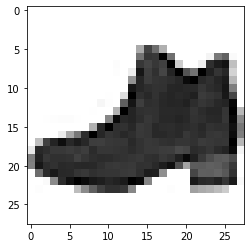

In [24]:
import matplotlib.pyplot as plt
num = 15
item=a_labels[num]
print("Class Label:", products_names[item])
plt.imshow(a_images[num], cmap=plt.cm.binary)
plt.show()

In [32]:
import numpy as np
print(a_labels)
print(np.unique(a_labels))
print(b_labels)
print(np.unique(b_labels))

[9 0 0 ... 3 0 5]
[0 1 2 3 4 5 6 7 8 9]
[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]


**Creating the Netwrok Architecture**

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [45]:
#COMPILATION STEP:
network.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
#PREPARING THE IMAGE DATA:
a_images=a_images.reshape((60000, 28*28))
a_images=a_images.astype("float32")/255

b_images=b_images.reshape((10000, 28*28))
b_images=b_images.astype("float32")/255

In [43]:
#PREPARING LABELS:
a_labels[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [44]:
#ONE-HOT-ENCODE

from tensorflow.keras.utils import to_categorical
a_labels = to_categorical(a_labels)
b_labels = to_categorical(b_labels)

In [35]:
#TRAIN THE MODEL
network.fit(a_images, a_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.7541 - accuracy: 0.7436
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3941 - accuracy: 0.8568
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3414 - accuracy: 0.8760
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3136 - accuracy: 0.8829
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2958 - accuracy: 0.8895


In [38]:
#EVALUATE THE MODEL
test_loss, test_acc = network.evaluate(b_images, b_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy:", test_acc )

313/313 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8803
Test Loss:  0.33870649337768555
Test Accuracy: 0.880299985408783
